In [32]:
# Gender Predict Project Structure
# Import Libraries
import tensorflow as tf
import keras
import numpy as np
import os
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM, Bidirectional, Conv2D, MaxPooling2D, Flatten
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import face_recognition as fr


In [21]:

x = []
y = []

# Create Dataset for male images
for i in range(1, 101):
    img = keras.preprocessing.image.load_img(f'dataset/m-{i}.jpg', target_size=(100, 100))
    img_array = keras.preprocessing.image.img_to_array(img)
    x.append(img_array)  # Add image to list
    y.append(1)  # Label for male

# Create Dataset for female images
for i in range(1, 101):
    img = keras.preprocessing.image.load_img(f'dataset/w-{i}.jpg', target_size=(100, 100))
    img_array = keras.preprocessing.image.img_to_array(img)
    x.append(img_array)  # Add image to list
    y.append(0)  # Label for female

# Convert list to numpy arrays
x = np.array(x)
y = np.array(y)


In [22]:
train_images, test_images, train_labels, test_labels = train_test_split(x, y, test_size=0.2, random_state=42)

In [23]:
# Create Model
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2))

C:\Users\ariya\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [31]:
class_names = ['Female', 'Male']

# Compile Model

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Train Model

history = model.fit(train_images, train_labels, epochs=15, validation_data=(test_images, test_labels))

Epoch 1/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 2s 156ms/step - accuracy: 0.9795 - loss: 0.2146 - val_accuracy: 0.4750 - val_loss: 9.0780
Epoch 2/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 119ms/step - accuracy: 0.9400 - loss: 0.1822 - val_accuracy: 0.4500 - val_loss: 4.5064
Epoch 3/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 106ms/step - accuracy: 0.9881 - loss: 0.1659 - val_accuracy: 0.5250 - val_loss: 4.9947
Epoch 4/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 109ms/step - accuracy: 0.9898 - loss: 0.0187 - val_accuracy: 0.5250 - val_loss: 5.5586
Epoch 5/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 102ms/step - accuracy: 1.0000 - loss: 0.0013 - val_accuracy: 0.5250 - val_loss: 7.0620
Epoch 6/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 93ms/step - accuracy: 1.0000 - loss: 0.0018 - val_accuracy: 0.5250 - val_loss: 10.6977
Epoch 7/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 99ms/step - accuracy: 0.9923 - loss: 0.0623 - val_accuracy: 0.3750 - val_loss: 7.3552
Epoch 8/15
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 110ms/step - accuracy: 0.9915 - loss: 0.0313 - val_accuracy: 0.4500 - val_loss: 

In [25]:
model.save('gender_predictor.h5')

In [54]:
from keras_visualizer import visualizer
visualizer(model, 'predictor', 'png')

In [56]:
# Predict function 
def predict_gender(img_path):
    img = keras.preprocessing.image.load_img(img_path, target_size=(100, 100))
    img_array = keras.preprocessing.image.img_to_array(img)
    predict_gender = model.predict(np.array([img_array]))
    return class_names[np.argmax(predict_gender[0])]    

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
The predicted gender for test/man.jpg is: Male


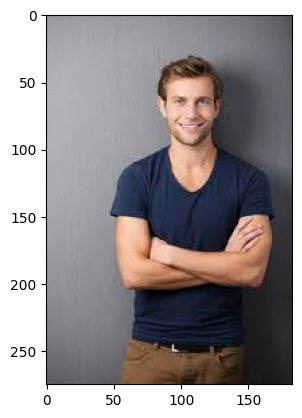

In [61]:
# Testing the model
img_path = 'test/man.jpg'
result = predict_gender(img_path)
print(f'The predicted gender for {img_path} is: {result}')
plt.imshow(plt.imread(img_path))